## Monte Carlo methods

In [1]:
#We import the numpy package
import numpy as np

#We import the pyplot package
from matplotlib import pyplot as plt

We define where we throw a dice and do the average

In [2]:
#We define the function sample mean
def function_samplemean(n):
    #We store the results of n Binomial samples
    F=np.random.binomial(1,0.5,n)

    #We calculate and return the mean of the Binomial samples
    return np.mean(F)

We launch 10 coins 5 times

In [3]:
for i in range(0,5):
    print (function_samplemean(10))

0.6
0.6
0.6
0.5
0.2


We repeat the same experiment, but this time we are going to toss 1.000 coins. 

In [4]:
for i in range(0,5):
    print (function_samplemean(1000))

0.503
0.5
0.501
0.49
0.524


In the strong law of Large Numbers the convergence is almost sure
if we start doing simulations, the sample mean will tend to the theoretical expectation.

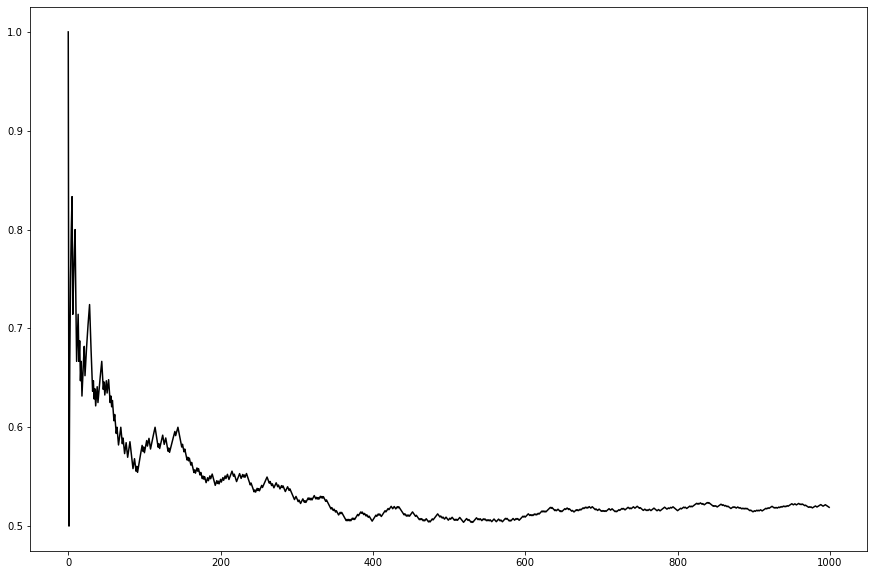

In [5]:
#We create a vector of 1.001 positions full of zeros
samplemean=np.zeros([1001])

#When we do 0 tosses, the sample mean is 0.
samplemean[0]=0

#We do 1.000 tosses and store them in the coin variable
coin=np.random.binomial(1,0.5,1000)

#We calculate the evolution of the sample mean
for i in range (0,1000):
    samplemean[i+1]=samplemean[i]*i/(i+1)+coin[i]/(i+1)

#We define the figure and the size    
plt.figure(figsize=(15,10))

#We plot the evolution of the sample mean
plt.plot(samplemean[1:], 'k')

#plt.savefig('C:/Users/ra_me/Dropbox/Doc/17- Book - Introduction to Financial Mathematics/gfx/7-MC/MC_Almost_sureGray.eps', format='eps', bbox_inches='tight', pad_inches=0)

#Show figure
plt.show()

In the weak law of Large Numbers the convergence is in probability.
That means that the probability of being near the theoretical expectation tends to one as the number of simulations increases.

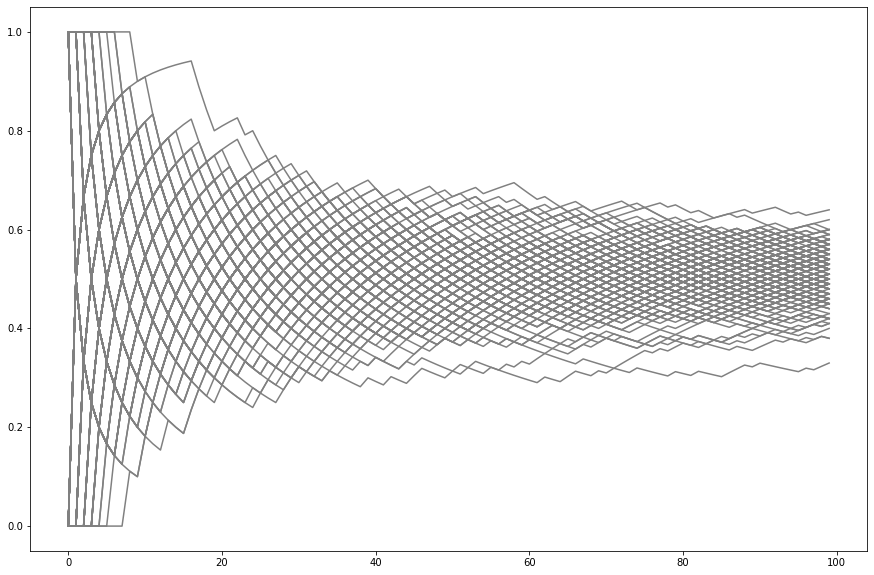

In [6]:
#We define the figure and the size    
plt.figure(figsize=(15,10))

#We will repeat 200 times the experiment
for i in range (0,200):
    #We create a vector with 101 positions
    samplemean=np.zeros([101])

    #When we do 0 tosses, the sample mean is 0.
    samplemean[0]=0

    #We do 100 coin tosses
    coin=np.random.binomial(1,0.5,100)

    #for each toss, we calculate the evolution of the sample mean
    for i in range (0,100):
        samplemean[i+1]=samplemean[i]*i/(i+1)+coin[i]/(i+1)      
        
    #We plot each evolution
    plt.plot(samplemean[1:], 'gray')

#plt.savefig('C:/Users/ra_me/Dropbox/Doc/17- Book - Introduction to Financial Mathematics/gfx/7-MC/MC_ProbabilityGray.eps', format='eps', bbox_inches='tight', pad_inches=0)

plt.show()

In this example, we take n=10.000 and, with this sample size, we execute 100.000 times the function samplesize.
Then, we plot the histogram corresponding to this 100.000 realizations of the sample mean. 

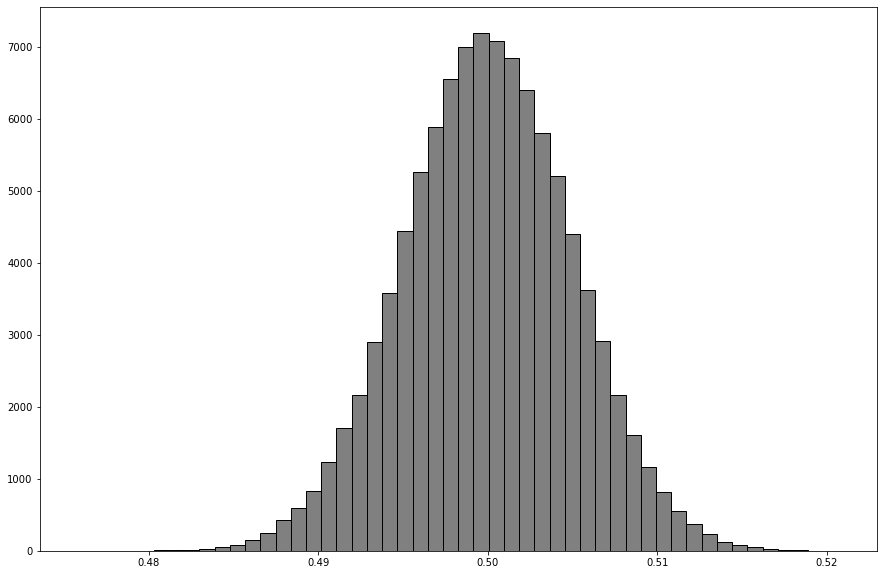

In [7]:
#We define the figure and the size    
plt.figure(figsize=(15,10))

#We set the variable n with the value 10.000
n=10000

#We create a vector of 100.000 positions full of zeros
simulation=np.zeros(100000)

#We calculate the empirical mean of 10.000 Binomials 
#and repeat it 100.000 times.
for i in range (0,100000):
    simulation[i]=function_samplemean(n)

#We plot the histogram with 50 buckets
plt.hist(simulation, 50, color='gray',edgecolor = 'black')

#plt.savefig('C:/Users/ra_me/Dropbox/Doc/17- Book - Introduction to Financial Mathematics/gfx/7-MC/MC_HistoGray.eps', format='eps', bbox_inches='tight', pad_inches=0)

plt.show()

## Monte Carlo for option pricing

The code shows how with very basic coding tools, we can create a Monte Carlo for option pricing.
The code is not efficient and is not vectorized. The reason is to keep the code simple and easy for all audiences.

We create our first MonteCarlo scheme to calculate the value of the option

In [8]:
#We define the Monte Carlo function
def MonteCarlo(S0,K,r,sigma,T,n):

    #We create the vector payoff with n positions full of zeros
    payoff=np.zeros(n)

    #We create the vector S with n positions full of zeros
    S=np.zeros(n)

    #We generate n different random numbers following a N(0,1).
    z=np.random.normal(0,1,n)

    #We calculate the stock value at maturity (it is a random variable).
    S=S0*np.exp(T*(r-sigma**2/2)+sigma*np.sqrt(T)*z)

    #We calculate the payoff
    payoff=np.maximum(S-K,0)

    #We return the discunted payoff
    return np.exp(-r*T)*np.mean(payoff)

We calculate the value of an option with different number of scenarios

In [10]:
for i in range(1,7):
    print("N. Simulations=", 100**i, "MC estimated option price=",\
        MonteCarlo(100,100,0.05,0.2,1,10**i))

N. Simulations= 100 MC estimated option price= 9.023149205605364
N. Simulations= 10000 MC estimated option price= 11.736585536435747
N. Simulations= 1000000 MC estimated option price= 9.968129814113222
N. Simulations= 100000000 MC estimated option price= 10.343292920993669
N. Simulations= 10000000000 MC estimated option price= 10.469097750300273
N. Simulations= 1000000000000 MC estimated option price= 10.464802944280011


We adapt the code to price a Barrier Option

In [15]:
def MonteCarlo_Barrier(S0,K,r,sigma,T,b,n):
    #We generate a matrix of normal nx101 random numbers
    z=np.random.normal(0,1,[n,100])
    
    #We create a matrix of nx101 to store the Brownian motion
    brownian=np.zeros([n,101])
    
    #We create a matrix of nx101 to store the Asset prices
    S=np.zeros([n,101])
    
    #We create a vector of n positions to store the Payoff
    payoff=np.zeros(n)
    
    #We set the initial value of the stock to the first column of 
    #the Asset Prices matrix
    S[0,:]=S0
    
    #For each simulation
    for i in range(0,n):
        
        #For each timestep (we split T in 101 times)
        for j in range(1,101):
            
            #We generate a Brownian motion of the timestep j*T/101
            brownian[i,j]=brownian[i,j-1] + np.sqrt(T/101)*z[i,j-1]
            
            #We generate the asset path
            S[i,j]=S0*np.exp((r-0.5*sigma**2)*(j*T/101)\
                             +sigma*brownian[i,j])
        
        #Once we have the full path, look if the barrier is reached
        #if so, the option is deactivate it
        if np.max(S[i,:])>b:
            payoff[i]=0
            
        #If not, we have a European option
        else:
            payoff[i]=np.maximum(S[i,100]-K, 0)
    
    #We discount the Payoff to move from T to now.
    return np.exp(-r*T)*np.mean(payoff)

We calculate the value of a barrier option with different number of scenarios

In [16]:
for i in range(0,10):
    print ("Barrier=", 110+10*i, "Option price=",\
        MonteCarlo_Barrier(100,100,0.05,0.2,1,110+10*i,100000))

Barrier= 110 Option price= 0.17526769985655755
Barrier= 120 Option price= 1.420320714800017
Barrier= 130 Option price= 3.673871230070858
Barrier= 140 Option price= 6.09894287247962
Barrier= 150 Option price= 7.894680177569524
Barrier= 160 Option price= 9.040338688150351
Barrier= 170 Option price= 9.647845059202645
Barrier= 180 Option price= 10.068707632819946
Barrier= 190 Option price= 10.205559470997434
Barrier= 200 Option price= 10.311619833868178


We adapt the code to price a Spread Option

In [17]:
def MonteCarloSpread(S01, S02, K, r, sigma1, sigma2, rho, T, n):
    
    #We create a vector of n positions to store the Payoff 
    payoff=np.zeros(n)

    #We create a vector of n positions to store the Asset prices #1
    S1=np.zeros(n)

    #We create a vector of n positions to store the Asset prices #2
    S2=np.zeros(n)

    #We generate a normal variable
    z1=np.random.normal(0,1,n)

    #We generate an auxiliar random variable
    u=np.random.normal(0,1,n)

    #We generate a correlated random variable
    z2=rho*z1+np.sqrt(1-rho**2)*u

    #We generate the values at T of the asset #1
    S1=S01*np.exp((r-0.5*sigma1**2)*T + sigma1*np.sqrt(T)*z1)

    #We generate the values at T of the asset #2
    S2=S02*np.exp((r-0.5*sigma2**2)*T + sigma2*np.sqrt(T)*z2)

    #We calculate the payoff
    payoff=np.maximum(S1-S2-K, 0)

    #We return the discounted payoff to move the Payoff from T to now
    return np.exp(-r*T)*np.mean(payoff)

We calculate the value of a spread option with different number of scenarios

In [18]:
for i in range(0,10):
    rho=round(0.1*i, 1)
    print ("Correlation=", rho, "Spread Option price=",\
        MonteCarloSpread(100, 100, 0, 0.05, 0.3, 0.2, rho, 1, 100000))

Correlation= 0.0 Spread Option price= 14.293049330529662
Correlation= 0.1 Spread Option price= 13.631663866630584
Correlation= 0.2 Spread Option price= 13.00471778388242
Correlation= 0.3 Spread Option price= 12.158019180081409
Correlation= 0.4 Spread Option price= 11.307845080387276
Correlation= 0.5 Spread Option price= 10.601543859734832
Correlation= 0.6 Spread Option price= 9.5060971962848
Correlation= 0.7 Spread Option price= 8.512192094592743
Correlation= 0.8 Spread Option price= 7.37695437838555
Correlation= 0.9 Spread Option price= 5.923545312418356
